# code2vec using bag-of-words (BOW) approaches

###  As a baseline for learning representations

VECTORIZE - Create code vectors using different strategies:

1. Word Vectors
    * Count
    * TF-IDF
    * Frequency (ratio)
    * Binary (Presence / Absence)
2. Token Vectors
    * Count
3. AST Vectors

TRAIN - Learn representations using these combinations of code vectors for a machine to differentiate between:

- correct code (code submission pass the testcases)
- wrong code (code submission fail the testcases)

In [60]:
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
font = {'weight': 'bold', 'size': 20}
plt.rc('font', **font)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, \
confusion_matrix, classification_report

## TRAIN

Load matrices:

In [3]:
encoded_docs_count = np.load('data/processed/word_count.npy')

In [4]:
word_labels = np.load('data/processed/word_labels.npy')

In [5]:
# encoded_docs_tfidf = np.load('data/processed/word_tfidf.npy')

In [6]:
# encoded_docs_freq = np.load('data/processed/word_freq.npy')

In [7]:
# encoded_docs_binary = np.load('data/processed/word_binary.npy')

In [8]:
encoded_category_tokens_count = np.load('data/processed/token_cat_count.npy')

In [9]:
encoded_word_tokens_count = np.load('data/processed/token_word_count.npy')

In [10]:
token_labels = np.load('data/processed/token_labels.npy')

In [63]:
encoded_ast_count = np.load('data/processed/ast_count.npy')

In [64]:
ast_labels = np.load('data/processed/ast_labels.npy')

Combinations of BOW models to compare:

In [65]:
d = {
    'Word Count': (encoded_docs_count, word_labels),
    #'Word TFIDF': (encoded_docs_tfidf, word_labels),
    #'Word Freq': (encoded_docs_freq, word_labels),
    #'Word Binary': (encoded_docs_binary, word_labels),
    'Token Category Count': (encoded_category_tokens_count, token_labels),
    'Token Word Count': (encoded_word_tokens_count, token_labels),
    'AST Word Count': (encoded_ast_count, ast_labels),
}

In [19]:
def score(dictionary, name):
    
    X, y = dictionary[name]
        
    print 'Features:', name
    print 'Splitting between training and test data'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    print 'Declaring NB'
    nb = MultinomialNB()

    print 'Fitting'
    nb.fit(X_train, y_train)

    print 'Predicting values for test data'
    y_pred = nb.predict(X_test)

    print 'Scoring'
    result = {
        'accuracy': nb.score(X_test, y_test),
        'f1': f1_score(y_test, y_pred),
        'f1_weighted': f1_score(y_test, y_pred, average='weighted'),
        'precision': precision_score(y_test, y_pred),
        'precision_weighted': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred),
        'recall_weighted': recall_score(y_test, y_pred, average='weighted'),
        'roc_auc_score': roc_auc_score(y_test, y_pred),
        'roc_auc_score_weighted': roc_auc_score(y_test, y_pred, average='weighted'),
    }

    print 'Confusion Matrix:'
    print(confusion_matrix(y_test, y_pred))
    print 'Classification Report:'
    print(classification_report(y_test, y_pred))

    return result

In [20]:
word_count_score = score(d, 'Word Count')

Features: Word Count
Splitting between training and test data
Declaring NB
Fitting
Predicting values for test data
Scoring
Confusion Matrix:
[[35762 23462]
 [16351 22589]]
Classification Report:
             precision    recall  f1-score   support

          0       0.69      0.60      0.64     59224
          1       0.49      0.58      0.53     38940

avg / total       0.61      0.59      0.60     98164



In [21]:
category_count_score = score(d, 'Token Category Count')

Features: Token Category Count
Splitting between training and test data
Declaring NB
Fitting
Predicting values for test data
Scoring
Confusion Matrix:
[[53192  3072]
 [36309  1845]]
Classification Report:
             precision    recall  f1-score   support

          0       0.59      0.95      0.73     56264
          1       0.38      0.05      0.09     38154

avg / total       0.51      0.58      0.47     94418



In [22]:
token_count_score = score(d, 'Token Word Count')

Features: Token Word Count
Splitting between training and test data
Declaring NB
Fitting
Predicting values for test data
Scoring
Confusion Matrix:
[[29528 26736]
 [13265 24889]]
Classification Report:
             precision    recall  f1-score   support

          0       0.69      0.52      0.60     56264
          1       0.48      0.65      0.55     38154

avg / total       0.61      0.58      0.58     94418



In [66]:
ast_count_score = score(d, 'AST Word Count')

Features: AST Word Count
Splitting between training and test data
Declaring NB
Fitting
Predicting values for test data
Scoring
Confusion Matrix:
[[20382 26406]
 [ 9896 27570]]
Classification Report:
             precision    recall  f1-score   support

          0       0.67      0.44      0.53     46788
          1       0.51      0.74      0.60     37466

avg / total       0.60      0.57      0.56     84254



## SCORE

In [50]:
# with open('data/processed/word_count_score.json', 'w') as outfile:
#     json.dump(word_count_score, outfile)

In [51]:
word_count_score = json.load(open('data/processed/word_count_score.json'))

In [52]:
# with open('data/processed/category_count_score.json', 'w') as outfile:
#     json.dump(category_count_score, outfile)

In [53]:
category_count_score = json.load(open('data/processed/category_count_score.json'))

In [54]:
# with open('data/processed/token_count_score.json', 'w') as outfile:
#     json.dump(token_count_score, outfile)

In [55]:
token_count_score = json.load(open('data/processed/token_count_score.json'))

In [67]:
# with open('data/processed/ast_count_score.json', 'w') as outfile:
#     json.dump(ast_count_score, outfile)

In [68]:
ast_count_score = json.load(open('data/processed/ast_count_score.json'))

Dictionary:

In [69]:
scores = {
    'Word Count': word_count_score,
    'Category Count': category_count_score,
    'Token Count': token_count_score,
    'AST Count': ast_count_score,
}

In [70]:
scores

{'AST Count': {u'accuracy': 0.5691361834452964,
  u'f1': 0.6030051836136567,
  u'f1_weighted': 0.5618803612567874,
  u'precision': 0.5107825700311249,
  u'precision_weighted': 0.6009552652032715,
  u'recall': 0.7358671862488656,
  u'recall_weighted': 0.5691361834452964,
  u'roc_auc_score': 0.5857458526781645,
  u'roc_auc_score_weighted': 0.5857458526781645},
 'Category Count': {u'accuracy': 0.5829079200999809,
  u'f1': 0.08567249425367418,
  u'f1_weighted': 0.4695294420781397,
  u'precision': 0.37522879804759,
  u'precision_weighted': 0.5057844133273715,
  u'recall': 0.04835665985217802,
  u'recall_weighted': 0.5829079200999809,
  u'roc_auc_score': 0.4968784578942392,
  u'roc_auc_score_weighted': 0.4968784578942392},
 'Token Count': {u'accuracy': 0.5763413755851639,
  u'f1': 0.5544503725815614,
  u'f1_weighted': 0.5793183858061632,
  u'precision': 0.48211138014527843,
  u'precision_weighted': 0.6060044575978925,
  u'recall': 0.6523300309272947,
  u'recall_weighted': 0.5763413755851639,

In [83]:
def plot(scores):
    x = range(len(scores))
    acc = [v['accuracy'] for k, v in scores.items()]
    f1_weighted = [v['f1_weighted'] for k, v in scores.items()]
    precision_weighted = [v['precision_weighted'] for k, v in scores.items()]
    recall_weighted = [v['recall_weighted'] for k, v in scores.items()]
    roc_auc_score_weighted = [v['roc_auc_score_weighted'] for k, v in scores.items()]
    keys = [k.replace(' ', '\n') for k, v in scores.items()]

    plt.subplots(figsize=(18, 10))
    plt.grid()
    plt.plot(x, acc, 'o-', color='blue', label='ACC', markersize=10)
    plt.plot(x, f1_weighted, 'o-', color='green', label='Weighted F1', markersize=10)
    #plt.plot(x, precision_weighted, 'o-', color='orange', label='Weighted Precision', markersize=10)
    # plt.plot(x, recall_weighted, 'o-', color='purple', label='Weighted Recall', markersize=10)
    #plt.plot(x, roc_auc_score_weighted, 'o-', color='red', label='Weighted ROC AUC', markersize=10)
    plt.ylabel('Score', fontsize=30)
    plt.xlabel('Features', fontsize=30)
    plt.xlim([-1, len(scores) + 1])
    plt.xticks(x, keys)
    plt.ylim([0.4, 0.7])
    plt.yticks(np.arange(0.4, 0.71, 0.1))
    plt.legend(loc="upper right", fontsize=18)

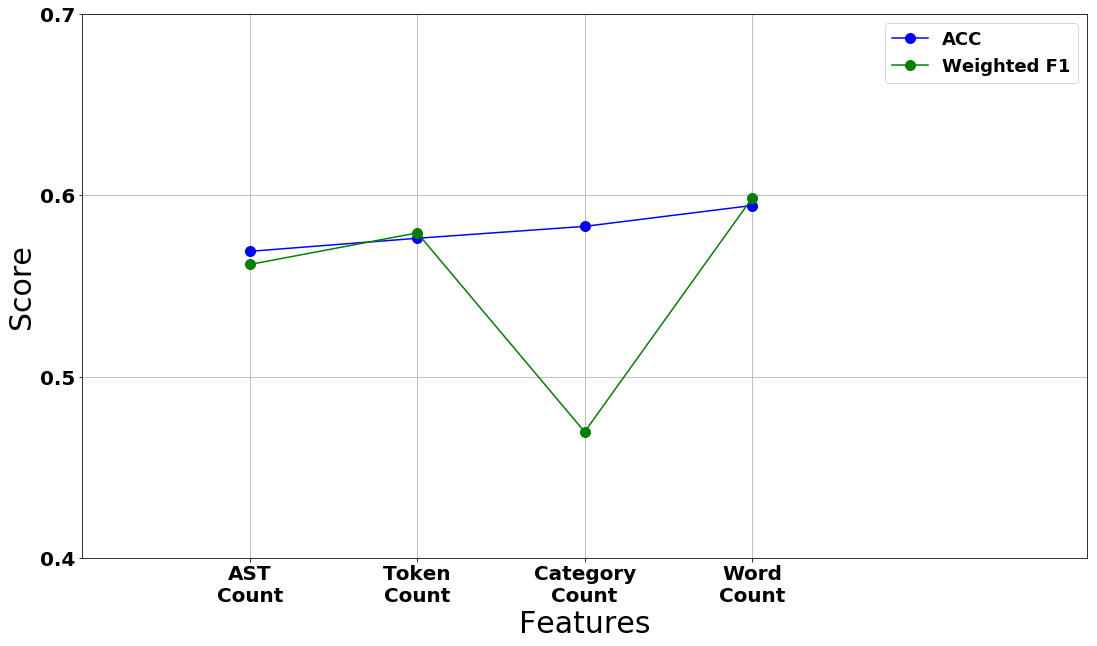

In [84]:
plot(scores)